In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

best_features_indexed = [
                0, 1, 3, 4, 5, 6, 7, 8,
                9, 10, 11, 12, 13, 14,
                15, 16, 17, 18, 19, 20,
                21, 22, 23, 24, 25, 26,
                27, 28, 29, 30, 31, 32,
                33, 34, 35
            ]


df = pd.read_csv(
    r"D:\dtc-dr\data-analyse\continuous_factory_process.csv", delimiter=","
)

prefixes_to_match = ["Machine1", "Machine2", "Machine3", "time_stamp"]

# Use list comprehension to filter columns based on prefixes
filtered_columns = [
    col
    for col in df.columns
    if any(col.startswith(prefix) for prefix in prefixes_to_match)
]

# X = df[filtered_columns]
X = df[[filtered_columns[x] for x in best_features_indexed]]
X = X.drop("time_stamp", axis=1)
y = df["Stage1.Output.Measurement0.U.Actual"]

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize empty lists to store the results
train_r2_scores = []
train_mse_values = []
train_rmse_values = []

test_r2_scores = []
test_mse_values = []
test_rmse_values = []

for i in range(2, 100):
    # Create and train a multilinear regression model
    model = DecisionTreeRegressor(max_leaf_nodes=i, splitter="random")
    model.fit(X_train, y_train)

    # Print results from the training set
    train_r2_score = model.score(X_train, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    train_rmse = np.sqrt(train_mse)

    # Save training results
    train_r2_scores.append(train_r2_score)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance on the test set
    test_r2_score = model.score(X_test, y_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)

    # Save test results
    test_r2_scores.append(test_r2_score)
    test_mse_values.append(test_mse)
    test_rmse_values.append(test_rmse)

    # Print or do anything else you want with the results
    print(f"Aantal knopen: {i}\t")
    print(f'Training set - R-squared: {train_r2_score}')
    print(f'Training set - Mean Squared Error: {train_mse}')
    print(f'Training set - Root Mean Squared Error: {train_rmse}')
    print(f'Test set - R-squared: {test_r2_score}')
    print(f'Test set - Mean Squared Error: {test_mse}')
    print(f'Test set - Root Mean Squared Error: {test_rmse}')
    print("\t")

Aantal knopen: 2	
Training set - R-squared: 0.017740352470830056
Training set - Mean Squared Error: 0.9257713514700223
Training set - Root Mean Squared Error: 0.9621701260536113
Test set - R-squared: -0.0239451964845947
Test set - Mean Squared Error: 0.6072534489985134
Test set - Root Mean Squared Error: 0.7792646848141608
	
Aantal knopen: 3	
Training set - R-squared: 0.040012050229192186
Training set - Mean Squared Error: 0.904780466030357
Training set - Root Mean Squared Error: 0.9511994880309582
Test set - R-squared: -0.04876729870176888
Test set - Mean Squared Error: 0.6219742633883092
Test set - Root Mean Squared Error: 0.7886534494873583
	
Aantal knopen: 4	
Training set - R-squared: 0.06475249280241047
Training set - Mean Squared Error: 0.8814628096300471
Training set - Root Mean Squared Error: 0.9388625083738551
Test set - R-squared: -0.20192196781125826
Test set - Mean Squared Error: 0.712803051263152
Test set - Root Mean Squared Error: 0.8442766437981996
	
Aantal knopen: 5	
Tr

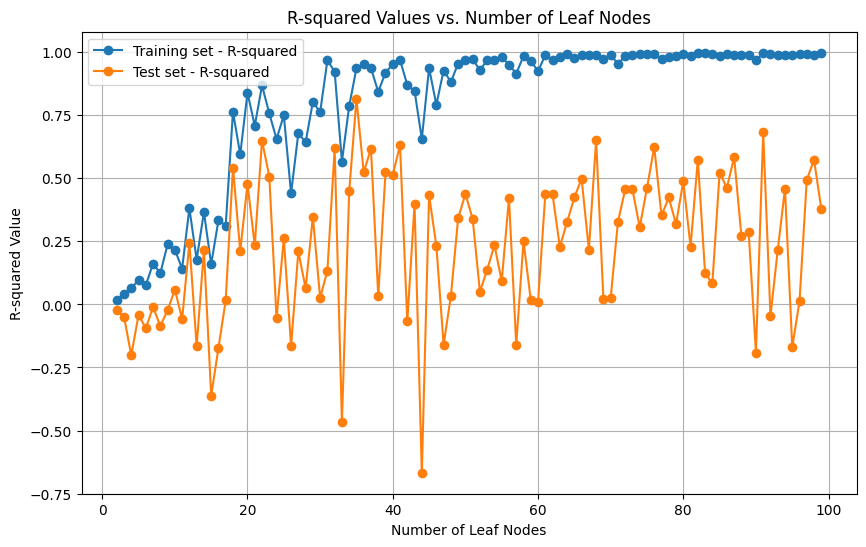

In [26]:
import matplotlib.pyplot as plt

# Assuming you've run the loop and collected the values in the lists mentioned in the previous response

# Plotting R-squared values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 100), train_r2_scores, label='Training set - R-squared', marker='o')
plt.plot(range(2, 100), test_r2_scores, label='Test set - R-squared', marker='o')

plt.title('R-squared Values vs. Number of Leaf Nodes')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('R-squared Value')
plt.legend()
plt.grid(True)
plt.show()